1. В данном кейсе будут использованы все 3 модели
2. В качестве метрики используется Recall, относительно класса 0 (не приведет к депозиту), также важно использовать именно Recall из-за необходимости верно определить класс 1 (приведет к депозиту) 

In [1]:
import pandas as pd # Для работы с табличными данными

import matplotlib # Для отрисовки графиков
import matplotlib.pyplot as plt # Для отрисовки графиков

# выбор темы картинок (необязательная строчка)
matplotlib.style.use('ggplot')
# Эта строчка нужна для того, чтобы картинки отображались в ячейках
%matplotlib inline

In [2]:
df_bank = pd.read_csv('bank.csv', sep = ';', encoding = 'cp1251')
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [4]:
df_bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [6]:
df_bank.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4520,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [8]:
df_bank.shape

(4521, 17)

In [9]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [10]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [13]:
df_bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [16]:
for i in df_bank.columns:
    print(i)
    print(df_bank[i].unique())
#df_bank.job.unique()

age
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
job
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
marital
['married' 'single' 'divorced']
education
['primary' 'secondary' 'tertiary' 'unknown']
default
['no' 'yes']
balance
[ 1787  4789  1350 ...  -333 -3313  1137]
housing
['no' 'yes']
loan
['no' 'yes']
contact
['cellular' 'unknown' 'telephone']
day
[19 11 16  3  5 23 14  6 17 20 13 30 29 27  7 18 12 21 26 22  2  4 15  8
 28  9  1 10 31 25 24]
month
['oct' 'may' 'apr' 'jun' 'feb' 'aug' 'jan' 'jul' 'nov' 'sep' 'mar' 'dec']
duration
[  79  220  185  199  226  141  341  151   57  313  273  113  328  261
   89  189  239  114  250  148   96  140  109  125  169  182  247  119
  149   74  897   81   40  958  354  150   97  132  765   

In [54]:
df_bank.groupby('job').size()

poutcome
failure     470
other       188
success     117
unknown    3536
dtype: int64

In [23]:
df_bank.groupby('education').size()

education
primary       678
secondary    2306
tertiary     1350
unknown       187
dtype: int64

In [24]:
df_bank.groupby('contact').size()

contact
cellular     2896
telephone     301
unknown      1324
dtype: int64

In [25]:
df_bank.groupby('poutcome').size()

poutcome
failure     490
other       197
success     129
unknown    3705
dtype: int64

In [26]:
df_bank.job.unique()

array(['unemployed', 'services', 'management', 'blue-collar',
       'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
       'housemaid', 'retired', 'unknown'], dtype=object)

In [3]:
job_dict = {0:['student','unemployed','retired'], #без работы\низкий заработок
             1:['services','blue-collar','technician','housemaid'], #средний заработок
             2:['management','entrepreneur','admin.','self-employed' ]} #высокий заработок
for key,values in job_dict.items():
    df_bank['job'][df_bank['job'].isin(values)] = key
df_bank

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/3677390431.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['job'][df_bank['job'].isin(values)] = key


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,2,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,2,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,2,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [37]:
df_bank.job.unique()

array([0, 1, 2], dtype=object)

In [4]:
df_bank = df_bank[df_bank['job']!='unknown']

In [74]:
df_bank.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [5]:
marital_dict = {0:['divorced','single'], #одинокие, в первом попавшемся исследованиии разведенные приравниваються к одиноким
             1:['married']} #в браке, по исследованию, в среднем успешнее в экономическом плане.
for key,values in marital_dict.items():
    df_bank['marital'][df_bank['marital'].isin(values)] = key
df_bank

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/3058017065.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['marital'][df_bank['marital'].isin(values)] = key
E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,1,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,2,0,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,2,1,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,1,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,2,1,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,1,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [76]:
df_bank.education.unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

In [6]:
education_dict = {1:['primary'], #начальное образование
             2:['secondary'], #среднее
             3:['tertiary']} #высшее
for key,values in education_dict.items():
    df_bank['education'][df_bank['education'].isin(values)] = key
df_bank = df_bank[df_bank['education']!='unknown']
df_bank

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/1057585513.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['education'][df_bank['education'].isin(values)] = key
E:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,1,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,1,2,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,2,0,3,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,2,1,3,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,1,2,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,2,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,2,1,3,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,2,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,1,2,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no


In [78]:
df_bank.default.unique()

array(['no', 'yes'], dtype=object)

In [7]:
df_bank['default'] = df_bank['default'].map({'no':1,'yes':0}) #дефолт - плохо, поэтому 0

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/1752683914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['default'] = df_bank['default'].map({'no':1,'yes':0}) #дефолт - плохо, поэтому 0


In [80]:
df_bank.housing.unique()

array(['no', 'yes'], dtype=object)

In [8]:
df_bank['housing'] = df_bank['housing'].map({'no':1,'yes':2}) #Наличие кредита на жилье может указывать на высокий доход человека

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/2621134810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['housing'] = df_bank['housing'].map({'no':1,'yes':2}) #Наличие кредита на жилье может указывать на высокий доход человека


In [82]:
df_bank.loan.unique()

array(['no', 'yes'], dtype=object)

In [9]:
df_bank['loan'] = df_bank['loan'].map({'no':1,'yes':0}) #Наличие же обычного кредита можно считать отрицательным показателем, наверное

C:\Users\buhlo\AppData\Local\Temp/ipykernel_9712/2662717632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bank['loan'] = df_bank['loan'].map({'no':1,'yes':0}) #Наличие же обычного кредита можно считать отрицательным показателем, наверное


In [84]:
df_bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,1,1,1,1787,1,1,cellular,19,oct,79,1,-1,0,unknown,no
1,33,1,1,2,1,4789,2,0,cellular,11,may,220,1,339,4,failure,no
2,35,2,0,3,1,1350,2,1,cellular,16,apr,185,1,330,1,failure,no
3,30,2,1,3,1,1476,2,0,unknown,3,jun,199,4,-1,0,unknown,no
4,59,1,1,2,1,0,2,1,unknown,5,may,226,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,2,1,-333,2,1,cellular,30,jul,329,5,-1,0,unknown,no
4517,57,2,1,3,0,-3313,2,0,unknown,9,may,153,1,-1,0,unknown,no
4518,57,1,1,2,1,295,1,1,cellular,19,aug,151,11,-1,0,unknown,no
4519,28,1,1,2,1,1137,1,1,cellular,6,feb,129,4,211,3,other,no


In [85]:
df_bank.poutcome.unique()

array(['unknown', 'failure', 'other', 'success'], dtype=object)

In [86]:
df_bank.groupby('poutcome').size()

poutcome
failure     470
other       188
success     117
unknown    3536
dtype: int64

In [87]:
df_bank.groupby('contact').size()

contact
cellular     2784
telephone     280
unknown      1247
dtype: int64

In [88]:
df_bank.groupby('pdays').size()

pdays
-1      3536
 1         2
 2         6
 3         1
 5         1
        ... 
 687       1
 761       1
 804       1
 808       1
 871       1
Length: 285, dtype: int64

In [89]:
df_bank.describe()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous
count,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000,4311.000000
mean,40.970309,0.983067,1410.662723,1.574113,0.841568,15.908142,264.833449,2.805382,39.741591,0.544885
std,10.500185,0.129037,3015.650889,0.494534,0.365188,8.205590,260.940391,3.134040,100.048485,1.705530
min,19.000000,0.000000,-3313.000000,1.000000,0.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,1.000000,66.500000,1.000000,1.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,1.000000,440.000000,2.000000,1.000000,16.000000,187.000000,2.000000,-1.000000,0.000000
75%,48.000000,1.000000,1456.000000,2.000000,1.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,1.000000,71188.000000,2.000000,1.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [94]:
df_bank

,age,job,marital,education,default,balance,housing,loan,day,duration,campaign,previous,y
0,30,0,1,1,1,1787,1,1,19,79,1,0,0
1,33,1,1,2,1,4789,2,0,11,220,1,4,0
2,35,2,0,3,1,1350,2,1,16,185,1,1,0
3,30,2,1,3,1,1476,2,0,3,199,4,0,0
4,59,1,1,2,1,0,2,1,5,226,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,1,2,1,-333,2,1,30,329,5,0,0
4517,57,2,1,3,0,-3313,2,0,9,153,1,0,0
4518,57,1,1,2,1,295,1,1,19,151,11,0,0
4519,28,1,1,2,1,1137,1,1,6,129,4,3,0


In [10]:
#Много неизвестных данных
df_bank = df_bank.drop('pdays', axis =1)
df_bank = df_bank.drop('poutcome', axis =1)
#"Неважные" данные
df_bank = df_bank.drop('month', axis =1)
df_bank = df_bank.drop('contact', axis =1)

In [11]:
df_bank['y'] = df_bank['y'].map({'no':0,'yes':1}) 

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
y = df_bank['y']
x = df_bank.drop('y',axis=1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42, test_size = 0.2)

In [15]:
y_test.tail()

1832    0
3517    0
377     1
3376    0
315     0
Name: y, dtype: int64

In [16]:
from sklearn.linear_model import LogisticRegression
model_lg = LogisticRegression(
    # метод для поиска решения. Для небольших датасетов лучше подходит liblinear, sag и saga - для больших.
    # Варианты: newton-cg, lbfgs, liblinear, sag, saga
    solver = 'liblinear',
    # норма для регуляризации. Варианты: 'l1', 'l2', 'elasticnet', 'none'
    penalty = 'l2',
    # параметр регуляризации. Чем меньше, тем сильнее регуляризация. Положительный.
    C = 1,
    # параметр для остановки поиска решения.
    tol = 1e-4,
    # Опция для задачи мультиклассификации, когда есть несколько классов.
    multi_class = 'ovr'
    )

In [17]:
model_lg.fit(X_train, y_train)

LogisticRegression(C=1, multi_class='ovr', solver='liblinear')

In [18]:
y_pred_lg = model_lg.predict(X_test)

In [19]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_lg }).head(10)

,Реальные значения,Предсказанные значения
2906,0,0
1826,0,0
4173,0,0
3659,0,0
3298,0,0
1074,0,0
4317,0,0
1235,0,0
1478,0,0
1957,0,0


In [20]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_lg))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       776
           1       0.58      0.21      0.31        87

    accuracy                           0.90       863
   macro avg       0.75      0.60      0.63       863
weighted avg       0.88      0.90      0.88       863



### Наблюдаемая метрика Recall показала хороший результат в 0.98, следовательно мы можем утвержать, что модель работает с точностью в 98%

In [21]:
model_lg.coef_

array([[-2.64793506e-04, -1.84209154e-01, -4.10060309e-01,
         2.66504833e-01, -9.87321252e-01,  2.39797770e-05,
        -8.78901235e-01,  5.95002340e-01, -1.78835057e-03,
         3.71308204e-03, -1.13350371e-01,  1.73607249e-01]])

In [22]:
model_lg.intercept_ 

array([-1.46568653])

# В лесу

## И смотрим на деревья

In [107]:
from sklearn.tree import DecisionTreeClassifier 
model_dt = DecisionTreeClassifier(random_state = 42, criterion = 'gini', max_depth = 3, min_samples_leaf = 5)

# random_state = 42, для воспроизводимости результатов 
# criterion = 'gini', критерий разбиения ('gini' или 'entropy')
# max_depth = 3, максимальная глубина дерева
# min_samples_leaf = 5, минимальное число элементов в листе (может быть долей)

# Обучаем модель
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [110]:
from sklearn import tree
from sklearn.tree import export_graphviz
from graphviz import Source

In [109]:
!pip install graphviz

In [116]:
tree.export_graphviz(model_dt, 'tree.dot', proportion = True, filled = True, impurity = True, node_ids = True, precision = 1, feature_names = x.columns)

pd.DataFrame({'feature': x.columns,
              'importance': model_dt.feature_importances_}).sort_values('importance', ascending = False)

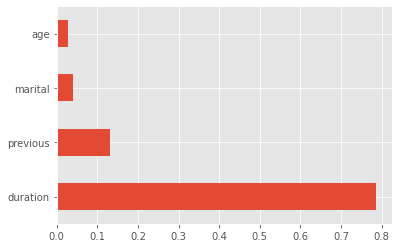

In [118]:
pd.Series(model_dt.feature_importances_, index = x.columns).nlargest(4).plot(kind='barh');

In [119]:
y_pred_dt = model_dt.predict(X_test)

In [120]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_dt}).head(10)

,Реальные значения,Предсказанные значения
2906,0,0
1826,0,0
4173,0,0
3659,0,0
3298,0,0
1074,0,0
4317,0,0
1235,0,0
1478,0,0
1957,0,0


In [121]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       776
           1       0.50      0.14      0.22        87

    accuracy                           0.90       863
   macro avg       0.71      0.56      0.58       863
weighted avg       0.87      0.90      0.87       863



### В данной модели Recall также показал 0.98, однако при сравнению с логистической регрессией она показала результат похуже, опираясь уже на другие метрики, например, f1-score

## Насмотрелись на дерево

In [28]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(random_state = 42, n_estimators = 1000, criterion ='gini', max_depth = 3,max_features="log2")

In [29]:
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features='log2', n_estimators=1000,
                       random_state=42)

In [30]:
y_pred_rf = model_rf.predict(X_test)

In [31]:
pd.DataFrame({'Реальные значения': y_test, 'Предсказанные значения': y_pred_rf}).head(10)

,Реальные значения,Предсказанные значения
2906,0,0
1826,0,0
4173,0,0
3659,0,0
3298,0,0
1074,0,0
4317,0,0
1235,0,0
1478,0,0
1957,0,0


In [32]:
for i in y_pred_rf:
    if i == 1:
        print(i)

In [158]:
print(metrics.classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       776
           1       0.00      0.00      0.00        87

    accuracy                           0.90       863
   macro avg       0.45      0.50      0.47       863
weighted avg       0.81      0.90      0.85       863



E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
E:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### По данным метрикам можно сделать вывод, что модель не работает, т.к. метрики относительно 1  равны 0, а значит не отнесла ничего к данному классу.

In [159]:
pd.DataFrame({'feature': x.columns,
              'importance': model_rf.feature_importances_}).sort_values('importance', ascending = False)

,feature,importance
9,duration,0.540799
11,previous,0.127464
0,age,0.108672
5,balance,0.057062
6,housing,0.043396
8,day,0.033867
2,marital,0.029280
1,job,0.025586
10,campaign,0.014279
3,education,0.009338


<AxesSubplot:>

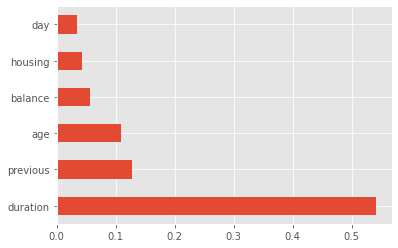

In [160]:
pd.Series(model_rf.feature_importances_, index = x.columns).nlargest(6).plot(kind = 'barh')

# Выводы

Из 3 моделей наилучший результат показал логистическая регрессия, а значит ее необходимо выбрать для решения подобных задач.